## Bài toán
 - Dự đoán khả năng tiến triển của bệnh tiểu đường thông qua các chỉ số sinh lý của cơ thể.


## Thông tin dữ liệu:

- Số lượng mẫu: 442 (thông tin từ 442 bệnh nhân)
- Thông tin ccs thuộc tính (10 cột đầu tiên):
  - Age(tuổi)
  - Sex (giới tính) 
  - Body mass index (chỉ số khối cơ thể)
  - Average blood pressure(huyết ap trung bình)
  - S1, S2, S3, S4, S5, S6 (sáu phép đo huyết thanh khác)
- Mục tiêu: Cột 11, chỉ số đánh giá mức độ tiến triển của bệnh sau 1 năm điều trị

**! Chú ý: Các thuộc tính trong dữ liệu đã được chuẩn hóa**

Xem thêm thông tin về nguồn dữ liệu tại: (https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)


## Hướng giải quyết

Giả sử rằng khả năng tiến triển của bệnh tiểu đường (ký hiệu: `y`) là đại lượng phụ thuộc tuyến tính vào các thông tin sinh lý của bệnh nhân như các thuộc tính đã mô tả ở trên (tuổi, giới tính, chỉ số khối, ... - ký hiệu: $x_1, x_2, .. x_n$) : 

$y = w_0 + w_1x_1 + w_1x_2 + ... + w_nx_n$

Mục tiêu: Tìm được bộ trọng số $[w_0, w_1, w_2... w_n]$ biểu diễn mối quan hệ này. 

## Thư viện sử dụng 

- matplotlib: phục vụ vẽ các đồ thị 
- numpy: tính toán các phép biến đổi trên ma trận / vector 
- math: thực hiện một số hàm tính toán đơn giản
- pandas: Xử lý dữ liệu bảng hai chiều 
- scikit-learn: (sklearn) thư viện hỗ trợ xây dựng các mô hình học máy, các hàm huấn luyện và đánh giá 


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import math 
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


## 1. Đọc dữ liệu 

Dữ liệu về bệnh tiểu đường được hỗ trợ bởi sklearn, đọc dữ liệu thông qua hàm `datasets.load_diabetes()` 

Xem thêm các bộ dữ liệu khác tại https://scikit-learn.org/stable/datasets/index.html#toy-datasets. 

Dữ liệu nhận về ở dạng object với các thành phần thuộc tính: 
- data: ma trận 2 chiều (442x10) - các thông tin bệnh nhân được chuẩn hoá về dạng số thực
- target: mảng các số thực (442,) - chỉ số tiến triển của bệnh tiểu đường

In [4]:
# sử dụng hàm load_diabetes để load dữ liệu
diabetes = datasets.load_diabetes()
# train_data = load(train_path)
print("Số chiều input: ", diabetes.data.shape)
print("Số chiều target y tương ứng: ", diabetes.target.shape)
print()

print("5 mẫu dữ liệu đầu tiên:")
print("input: ", diabetes.data[:2])
print("target: ",diabetes.target[:2])

Số chiều input:  (442, 10)
Số chiều target y tương ứng:  (442,)

5 mẫu dữ liệu đầu tiên:
input:  [[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]]
target:  [151.  75.]


## 2. Xây dựng mô hình hồi quy sử dụng Sklearn

Thử nghiệm xây dựng và huấn luyện mô hình hồi quy tuyến tính (Linear Regression)
- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) `linear_model.LinearRegression()`

In [7]:
# Xây dựng mô hình sử dụng thư viện scikit-learn
regr = linear_model.LinearRegression()


## 3. Huấn luyện mô hình

Sử dụng dữ liệu đã được chia ở bước trước đó để thực hiện huấn luyện mô hình 

=> Tìm được bộ trọng số $[w_0, w_1, ... w_n]$

In [9]:
# huấn luyện mô hình
regr.fit(diabetes_X_train, diabetes_y_train)
print("[w1, ... w_n] = ", regr.coef_)
print("w0 = ", regr.intercept_)

[w1, ... w_n] =  [   3.92433306 -253.94783649  520.35362721  300.43342402 -603.61603253
  325.29239155   10.80046579  139.51667826  669.06893875  111.45531856]
w0 =  152.7301323963886


## 4. Dự đoán các mẫu dữ liệu trong tập test 

# 4.1 Phán đoán

In [14]:
# data =  load(path)

# Thực hiện phán đoán cho dữ liệu mới
diabetes_y_pred = regr.predict(diabetes_X_test)


,Thực tế,Dự đoán,Lệch
0,321.0,234.908470,86.091530
1,58.0,163.457251,105.457251
2,262.0,163.571593,98.428407
3,206.0,167.786647,38.213353
4,233.0,254.212487,21.212487
...,...,...,...
75,178.0,191.809673,13.809673
76,104.0,104.520901,0.520901
77,132.0,123.523369,8.476631
78,220.0,209.999198,10.000802


## 4.2 Kiểm tra chất lượng phán đoán

In [15]:
pd.DataFrame(data=np.array([diabetes_y_test, diabetes_y_pred,
                            abs(diabetes_y_test - diabetes_y_pred)]).T,
             columns=["Thực tế", "Dự đoán", "Lệch"])

,Thực tế,Dự đoán,Lệch
0,321.0,234.908470,86.091530
1,58.0,163.457251,105.457251
2,262.0,163.571593,98.428407
3,206.0,167.786647,38.213353
4,233.0,254.212487,21.212487
...,...,...,...
75,178.0,191.809673,13.809673
76,104.0,104.520901,0.520901
77,132.0,123.523369,8.476631
78,220.0,209.999198,10.000802


Sử dụng độ đo RMSE tính căn bậc 2 của trung bình bình phương lỗi. 
> $\text{RMSE}(y, \hat{y}) = \sqrt{\frac{1}{m} \sum\limits_{i=1}^{m} (y_i - \hat{y}_i)^2}$

- Lỗi càng nhỏ càng thể hiện mô hình có khả năng học và dự đoán hiệu quả

In [24]:
print(f'RMSE = {math.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred))}')

RMSE = 51.64223924042993


Phân phối các dự đoán đầu ra của mô hình #undone

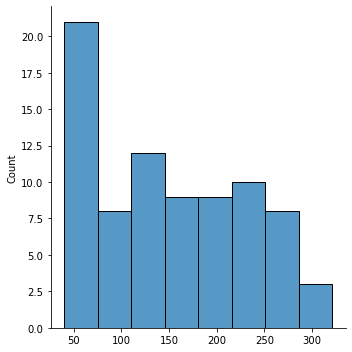

In [22]:
sns.displot(diabetes_y_test, )